# EDA of the datasets

## Importing the datasets

In [161]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer # scikit-learn
import matplotlib.pyplot as plt

In [162]:
movie_path=r'data\movies.csv'
rating_path=r'data\ratings.csv'
movie_df=pd.read_csv(movie_path)
rating_df=pd.read_csv(rating_path)

In [163]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [164]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [165]:
print(f"Movie Dataframe Shape {movie_df.shape}")
print(f"Movie Ratings Shape {rating_df.shape}")

Movie Dataframe Shape (9742, 3)
Movie Ratings Shape (100836, 4)


## Checking Null Values

In [166]:
movie_null_sum = movie_df.isnull().sum()
print(movie_null_sum)

movieId    0
title      0
genres     0
dtype: int64


In [167]:
rating_null_sum=rating_df.isnull().sum()
print(rating_null_sum)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


There aren't any null values in both datasets

## Checking the duplicates

In [168]:
duplicates_movie_title = movie_df['title'].duplicated(keep=False)  # keep=False marks all duplicates as True
movie_df[duplicates_movie_title]

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [169]:
duplicates_review_movieid = rating_df['movieId'].duplicated(keep=False)  # keep=False marks all duplicates as True
rating_df[duplicates_review_movieid]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Removing duplicates

In [170]:
movie_df=movie_df.drop_duplicates(subset='title', keep='first')
rating_df=rating_df.drop_duplicates(subset='movieId', keep='first')

## Describing the dataframes & Distribution

In [171]:
movie_df.describe()

,movieId
count,9737.000000
mean,42165.340865
std,52136.321521
min,1.000000
25%,3247.000000
50%,7294.000000
75%,76173.000000
max,193609.000000


In [172]:
rating_df.describe()

,userId,movieId,rating,timestamp
count,9724.000000,9724.000000,9724.000000,9.724000e+03
mean,214.491670,42245.024373,3.298026,1.241383e+09
std,199.585586,52191.137320,1.103966,2.193130e+08
min,1.000000,1.000000,0.500000,8.297598e+08
25%,33.000000,3245.500000,2.500000,1.049076e+09
50%,135.000000,7300.000000,3.500000,1.234190e+09
75%,387.000000,76739.250000,4.000000,1.460226e+09
max,610.000000,193609.000000,5.000000,1.537675e+09


### Distribution for Movie Id and Genres

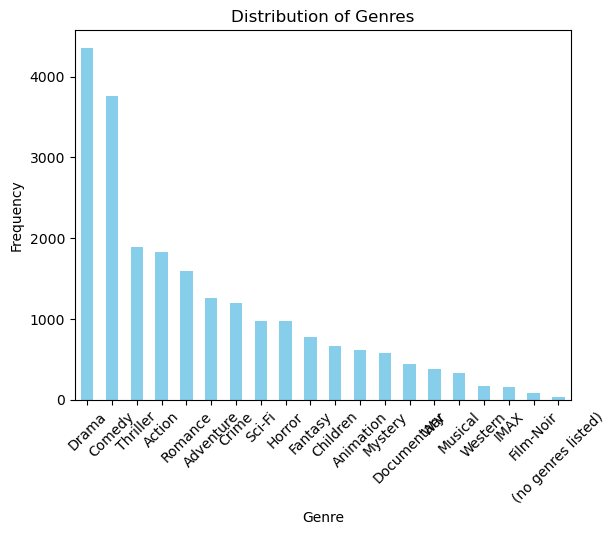

In [173]:
movie_df['genres'] = movie_df['genres'].str.split('|')
movie_df_exploded = movie_df.explode('genres')

genre_counts = movie_df_exploded['genres'].value_counts()

# Plotting the genre distribution
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Year Extraction

In [174]:
movie_df['year'] = movie_df['title'].str.extract(r'\((\d{4})\)')
movie_df['title'] = movie_df['title'].str.replace(r' \(\d{4}\)', '', regex=True)

movie_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


## Splitting by Genres (Binarize)

In [175]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_genres = pd.DataFrame(mlb.fit_transform(movie_df['genres']), columns=mlb.classes_, index=movie_df.index)
new_df = pd.concat([movie_df[['movieId', 'title', 'year']], df_genres], axis=1)

new_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
new_df.loc[new_df['(no genres listed)']>0]

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8517,114335,La cravate,1957,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8684,122888,Ben-hur,2016,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tales,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8782,129250,Superfast!,2015,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8836,132084,Let It Be Me,1995,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8902,134861,Trevor Noah: African American,2013,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9033,141131,Guardians,2016,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9053,141866,Green Room,2015,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9070,142456,The Brand New Testament,2015,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,143410,Hyena Road,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
new_df.loc[new_df['title']=='Black Mirror']

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9611,176601,Black Mirror,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Joining Rating Dataframe and Movie Dataframe

In [178]:
final_df = new_df.merge(rating_df, on='movieId', how='left')
final_df = final_df.drop_duplicates()
final_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1.0,4.0,964982703.0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,6.0,4.0,845553522.0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1.0,4.0,964981247.0
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,6.0,3.0,845554349.0
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,6.0,5.0,845553938.0


In [179]:
final_df.shape

(9737, 26)

In [180]:
final_df.isnull().sum()

movieId                0
title                  0
year                  13
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
userId                18
rating                18
timestamp             18
dtype: int64

In [181]:
rows_with_nulls = final_df[final_df.isnull().any(axis=1)]
rows_with_nulls

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
816,1076,"Innocents, The",1961,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
2211,2939,Niagara,1953,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
2499,3338,For All Mankind,1989,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda)",1999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3118,4194,I Know Where I'm Going!,1945,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,NaN,NaN,NaN
4037,5721,"Chosen, The",1981,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin)",1999,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,NaN,NaN,NaN
4598,6849,Scrooge,1970,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,NaN,NaN,NaN
4704,7020,Proof,1991,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,NaN,NaN,NaN
5020,7792,"Parallax View, The",1974,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN


In [182]:
final_df=final_df[~(final_df['userId'].isnull() & final_df['rating'].isnull())]
final_df.isnull().sum()

movieId                0
title                  0
year                  13
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
userId                 0
rating                 0
timestamp              0
dtype: int64